# Load data

In [1]:
import pandas as pd
from config import CSV_FILEPATH_UNCHANGED_DATA, CSV_FILEPATH_EXPLORATION_PREPROCESSED_DATA

df = pd.read_csv(CSV_FILEPATH_UNCHANGED_DATA, index_col=0)


In [2]:
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


# Data exploration

## Column analysis

### Title column analysis

In [3]:
df.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [4]:
df.at[0, 'title']

'Nicosia 2013 Vulkà Bianco  (Etna)'

In [5]:
df.at[0, 'winery'], df.at[0, 'designation'], df.at[0, 'region_1']

('Nicosia', 'Vulkà Bianco', 'Etna')

### Add vintage column

In [6]:
import pandas as pd
from collections import Counter

year_pat = r"\b(\d{4})\b"
nv_pat   = r"\bN\.?V\.?\b|\bNon[- ]?Vintage\b"

has_nv = df["title"].fillna("").str.contains(nv_pat, case=False, na=False)

title_years  = df["title"].fillna("").str.findall(year_pat)
desig_years  = df["designation"].fillna("").str.findall(year_pat)
winery_years = df["winery"].fillna("").str.findall(year_pat)

def extract_vintage(nv, tys, dys, wys):
    if nv:
        return pd.NA

    c = Counter(tys)
    c.subtract(dys)
    c.subtract(wys)

    for y, n in c.items():
        if n > 0:
            return int(y)

    return pd.NA # impossible case

df["vintage"] = pd.Series(
    [
        extract_vintage(nv, tys, dys, wys)
        for nv, tys, dys, wys in zip(
            has_nv, title_years, desig_years, winery_years
        )
    ],
    index=df.index,
    dtype="Int64",
)


In [7]:
df["vintage"].value_counts(dropna=False).sort_values()

vintage
1945        1
1968        1
1982        1
1947        1
1961        1
1941        1
1974        1
1934        1
1967        1
1957        1
1965        1
1973        1
1976        1
1935        1
1969        1
1952        2
1964        2
1987        2
1984        2
1983        2
1980        2
1966        2
1978        2
1963        3
1993        3
1991        4
1986        4
1985        4
1988        5
1990        5
1989        6
2017       11
1992       16
1994       23
1995       50
1996       67
1997      303
2002      366
1998      551
2003      598
1999      641
2001      691
2000      758
2004     1774
2005     3613
2016     3691
<NA>     4631
2006     5772
2007     7053
2008     7439
2009     9878
2015    10052
2010    12167
2011    12558
2014    15582
2012    15746
2013    15875
Name: count, dtype: Int64

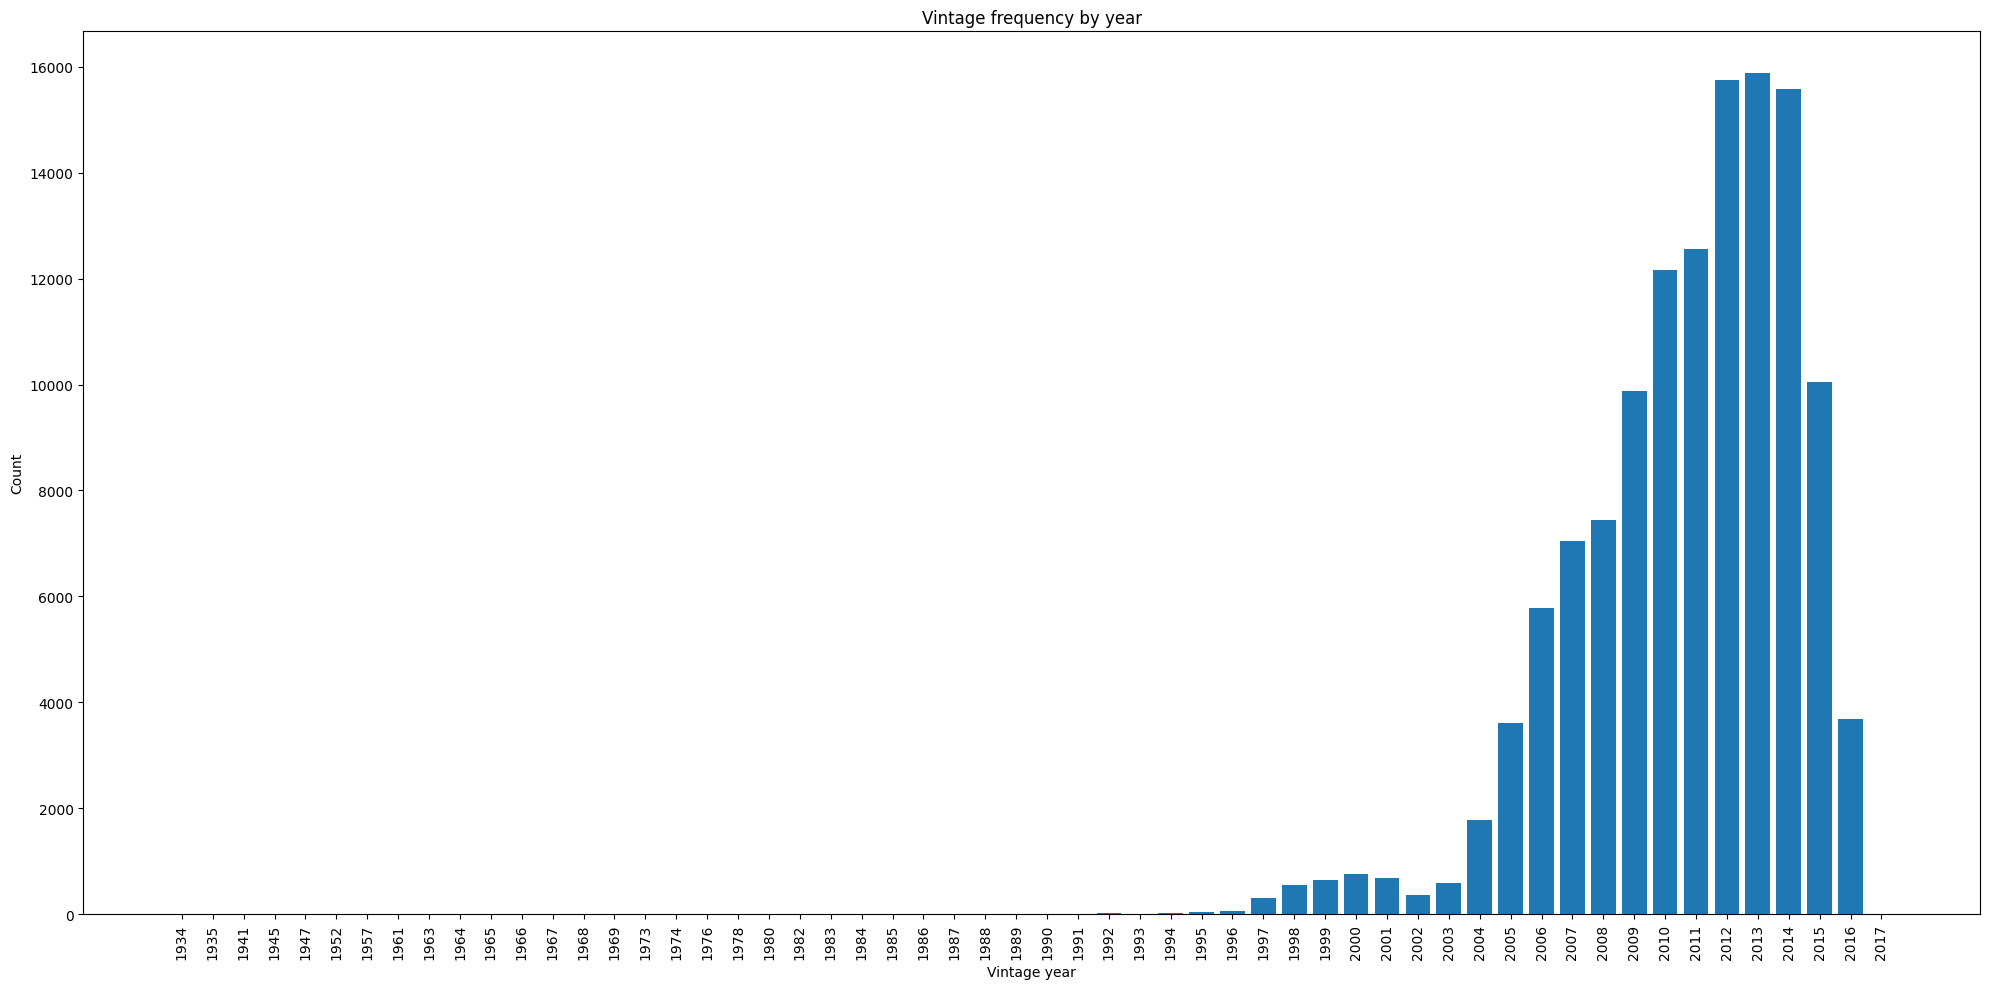

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Count vintages, drop NA to focus on years
vc = df["vintage"].value_counts().sort_index()

plt.figure(figsize=(20, 10)) 
plt.bar(vc.index.astype(str), vc.values)
plt.xlabel("Vintage year")
plt.ylabel("Count")
plt.title("Vintage frequency by year")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Delete title column

In [9]:
df = df.drop(columns=["title"])

We can delete column title, as all informations are included in the other columns: winery, designation, region_1, region_2, vintage

### Region columns analysis

In [10]:
import pandas as pd

# Basic uniqueness per column
n_unique_r1 = df["region_1"].nunique(dropna=False)
n_unique_r2 = df["region_2"].nunique(dropna=False)

# Unique (region_1, region_2) pairs
n_unique_pairs = df[["region_1", "region_2"]].drop_duplicates().shape[0]


summary = pd.DataFrame({
    "metric": [
        "unique region_1",
        "unique region_2",
        "unique (region_1, region_2) pairs",
    ],
    "value": [
        n_unique_r1,
        n_unique_r2,
        n_unique_pairs,
    ],
})

summary

,metric,value
0,unique region_1,1230
1,unique region_2,18
2,"unique (region_1, region_2) pairs",1237


In [11]:
union_n = pd.concat([df["region_1"], df["region_2"]]).nunique(dropna=False)
union_n

1232

#### For each region_1 (including null), count distinct region_2 values

In [12]:
region1_to_region2_counts = (
    df.groupby("region_1", dropna=False)["region_2"]
    .nunique(dropna=False)
    .sort_values(ascending=False)
)

region1_to_region2_counts.head(10)

region_1
Napa-Sonoma           2
Willamette Valley     2
South Coast           2
Central Coast         2
Sonoma                2
Niagara Escarpment    2
North Coast           2
Piemonte              1
Piedmont              1
Picpoul de Pinet      1
Name: region_2, dtype: int64

#### Pairs where region_1 or region_2 maps to multiple values ("nadmiarowe" relacje)

In [13]:
pairs_df = df[["region_1", "region_2"]].drop_duplicates()

r1_counts_pairs = pairs_df.groupby("region_1", dropna=False)["region_2"].nunique(dropna=False)
r2_counts_pairs = pairs_df.groupby("region_2", dropna=False)["region_1"].nunique(dropna=False)

pairs_with_multi = pairs_df[
    (pairs_df["region_1"].map(r1_counts_pairs) > 1)
    | (pairs_df["region_2"].map(r2_counts_pairs) > 1)
].copy()

pairs_with_multi = pairs_with_multi.assign(
    region_1_distinct_region_2=pairs_with_multi["region_1"].map(r1_counts_pairs),
    region_2_distinct_region_1=pairs_with_multi["region_2"].map(r2_counts_pairs),
).sort_values(
    ["region_1_distinct_region_2", "region_2_distinct_region_1", "region_1", "region_2"],
    ascending=False,
)

pairs_with_multi.head(15)


,region_1,region_2,region_1_distinct_region_2,region_2_distinct_region_1
278,Willamette Valley,NaN,2,1034
4255,South Coast,NaN,2,1034
27234,Sonoma,NaN,2,1034
588,North Coast,NaN,2,1034
6863,Niagara Escarpment,NaN,2,1034
117,Central Coast,NaN,2,1034
14,Central Coast,Central Coast,2,49
56,North Coast,North Coast,2,22
100017,Napa-Sonoma,North Coast,2,22
28227,Sonoma,Sonoma,2,17


#### Delete region_2 column

In [14]:
df = df.drop(columns=["region_2"])

We delete column region_2 because it probably won't give use to much useful information.

### Twitter handle column analysis

#### Check for missing taster names and taster twitter handles

In [15]:
missing_name = df["taster_name"].isna()
missing_tw = df["taster_twitter_handle"].isna()

counts = {
    "no_name_yes_twitter": (missing_name & ~missing_tw).sum(),
    "yes_name_yes_twitter": (~missing_name & ~missing_tw).sum(),
    "no_name_no_twitter": (missing_name & missing_tw).sum(),
    "yes_name_no_twitter": (~missing_name & missing_tw).sum(),
}
counts

{'no_name_yes_twitter': np.int64(0),
 'yes_name_yes_twitter': np.int64(98758),
 'no_name_no_twitter': np.int64(26244),
 'yes_name_no_twitter': np.int64(4969)}

Conclusion:
If taster have twitter handle, then he has a twitter name 

#### Twitter handles with more than one taster name

In [16]:
multi = (
    df.dropna(subset=["taster_twitter_handle"])
      .groupby("taster_twitter_handle")["taster_name"]
      .nunique()
      .gt(1)
)

multi.any()
multi[multi].index

Index(['@worldwineguys'], dtype='object', name='taster_twitter_handle')

In [17]:
df.loc[df["taster_twitter_handle"].isin(multi[multi].index),
       ["taster_twitter_handle", "taster_name"]].drop_duplicates()


,taster_twitter_handle,taster_name
202,@worldwineguys,Mike DeSimone
219,@worldwineguys,Jeff Jenssen


Conclusion:
There is only one twitter handle with two taster names. We can safely delete column taster_twitter_handle from the dataset as it will not be useful for solving our problem. 

#### Delete twitter handle column

In [18]:
df = df.drop(columns=["taster_twitter_handle"])

## Descriptive statistics

### Numerical features

In [19]:
num_cols = df.select_dtypes(include="number").columns
df[num_cols].describe()

,points,price,vintage
count,129971.000000,120975.000000,125340.0
mean,88.447138,35.363389,2010.684434
std,3.039730,41.022218,3.635172
min,80.000000,4.000000,1934.0
25%,86.000000,17.000000,2009.0
50%,88.000000,25.000000,2011.0
75%,91.000000,42.000000,2013.0
max,100.000000,3300.000000,2017.0


Conclusion:
Minimum number of points is 80. We can represent score as 0-20 instead of 80-100.

#### Correlation

In [20]:
pearson = df[num_cols].corr(method='pearson')
spearman = df[num_cols].corr(method='spearman')

print("Correlation between points and price")
print("Pearson: ", pearson['points']['price'])
print("Spearman:", spearman['points']['price'])

Correlation between points and price
Pearson:  0.4161667418606185
Spearman: 0.6057853020676699


#### Outliers

In [21]:
outlier_summary = []
for c in num_cols:
    s = df[c].dropna()
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    iqr_out_idx = s[(s < lower) | (s > upper)].index
    z = (s - s.mean()) / s.std()
    z_out_idx = s[ (z.abs() > 3) ].index
    outlier_summary.append({
        'variable': c,
        'n': len(s),
        'iqr_outliers': len(iqr_out_idx),
        'z_outliers': len(z_out_idx),
        'iqr_bounds': (lower, upper)
    })

outlier_df = pd.DataFrame(outlier_summary).set_index('variable')
display(outlier_df)

,n,iqr_outliers,z_outliers,iqr_bounds
variable,,,,
points,129971,52,129,"(78.5, 98.5)"
price,120975,7241,1177,"(-20.5, 79.5)"
vintage,125340,3531,1716,"(2003.0, 2019.0)"


##### Example outliers

In [22]:
key_feats = ['price','points']
for feat in key_feats:
    s = df[feat].dropna()
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    iqr_idx = s[(s < lower) | (s > upper)].index
    z = (s - s.mean()) / s.std()
    z_idx = s[(z.abs() > 3)].index
    print(f"\nFeature: {feat}")
    print(f"IQR bounds: {lower:.3f} - {upper:.3f} | IQR outliers: {len(iqr_idx)}")
    print("Sample IQR outlier rows (up to 5):")
    display(df.loc[iqr_idx].head())
    print(f"Z-score outliers (>3 or <-3): {len(z_idx)}; sample rows:")
    display(df.loc[z_idx].head())


Feature: price
IQR bounds: -20.500 - 79.500 | IQR outliers: 7241
Sample IQR outlier rows (up to 5):


,country,description,designation,points,price,province,region_1,taster_name,variety,winery,vintage
60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,Virginie Boone,Cabernet Sauvignon,Okapi,2013
111,US,This 100% varietal wine opens in a heady aroma...,Wolff Vineyard,87,85.0,California,Yountville,Virginie Boone,Cabernet Sauvignon,Piña,2013
118,Italy,"A blend of 50% Cabernet Sauvignon, 30% Merlot ...",Toscano,87,80.0,Tuscany,Toscana,Kerin O’Keefe,Red Blend,Tenuta Forconi,2013
119,France,Medium-gold in color. Complex and inviting nos...,Schoenenbourg Grand Cru Vendanges Tardives,92,80.0,Alsace,Alsace,NaN,Riesling,Dopff & Irion,2004
139,France,"Beautiful deep gold color. Intense, concentrat...",Cuvée Jerémy Sélection de Grains Nobles,90,112.0,Alsace,Alsace,NaN,Pinot Gris,Kuentz-Bas,2007


Z-score outliers (>3 or <-3): 1177; sample rows:


,country,description,designation,points,price,province,region_1,taster_name,variety,winery,vintage
284,Argentina,This huge Malbec defines jammy and concentrate...,Marchiori Vineyard Block C2,92,215.0,Mendoza Province,Perdriel,Michael Schachner,Malbec,Viña Cobos,2011
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,Joe Czerwinski,Muscat,Chambers Rosewood Vineyards,<NA>
346,Australia,"This deep brown wine smells like a damp, mossy...",Rare,98,350.0,Victoria,Rutherglen,Joe Czerwinski,Muscadelle,Chambers Rosewood Vineyards,<NA>
347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",Kiedrich Gräfenberg Trockenbeerenauslese,97,775.0,Rheingau,NaN,Anna Lee C. Iijima,Riesling,Robert Weil,2014
349,Australia,"RunRig is always complex, and the 2012 doesn't...",RunRig,97,225.0,South Australia,Barossa,Joe Czerwinski,Shiraz-Viognier,Torbreck,2012



Feature: points
IQR bounds: 78.500 - 98.500 | IQR outliers: 52
Sample IQR outlier rows (up to 5):


,country,description,designation,points,price,province,region_1,taster_name,variety,winery,vintage
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,Joe Czerwinski,Muscat,Chambers Rosewood Vineyards,<NA>
1556,US,The flagship wine from Quilceda Creek offers e...,NaN,99,125.0,Washington,Columbia Valley (WA),Paul Gregutt,Cabernet Sauvignon,Quilceda Creek,2008
1557,US,"A stupendous Pinot Noir, showing how beautiful...",Precious Mountain Vineyard,99,94.0,California,Sonoma Coast,NaN,Pinot Noir,Williams Selyem,2009
7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,NaN,Prugnolo Gentile,Avignonesi,1995
35517,Italy,"One of Italy's most iconic bottlings, the 2012...",Sassicaia,99,235.0,Tuscany,Bolgheri Sassicaia,Kerin O’Keefe,Red Blend,Tenuta San Guido,2012


Z-score outliers (>3 or <-3): 129; sample rows:


,country,description,designation,points,price,province,region_1,taster_name,variety,winery,vintage
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,Joe Czerwinski,Muscat,Chambers Rosewood Vineyards,<NA>
346,Australia,"This deep brown wine smells like a damp, mossy...",Rare,98,350.0,Victoria,Rutherglen,Joe Czerwinski,Muscadelle,Chambers Rosewood Vineyards,<NA>
1556,US,The flagship wine from Quilceda Creek offers e...,NaN,99,125.0,Washington,Columbia Valley (WA),Paul Gregutt,Cabernet Sauvignon,Quilceda Creek,2008
1557,US,"A stupendous Pinot Noir, showing how beautiful...",Precious Mountain Vineyard,99,94.0,California,Sonoma Coast,NaN,Pinot Noir,Williams Selyem,2009
1558,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,Roger Voss,Bordeaux-style Red Blend,Château Margaux,2009


#### Plots

##### Histograms

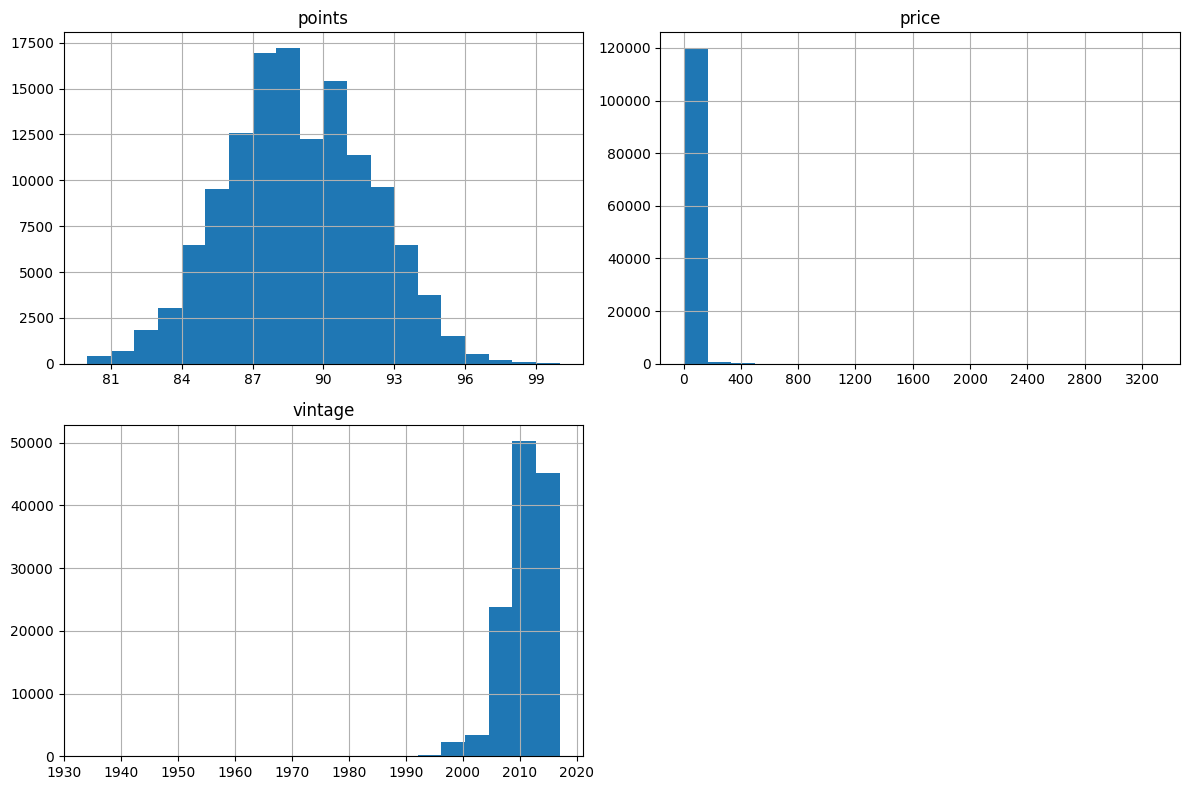

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

axes = df[num_cols].hist(bins=20, figsize=(12, 8))
for ax in axes.ravel():
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()

##### Histogram for price in logarithmic scale

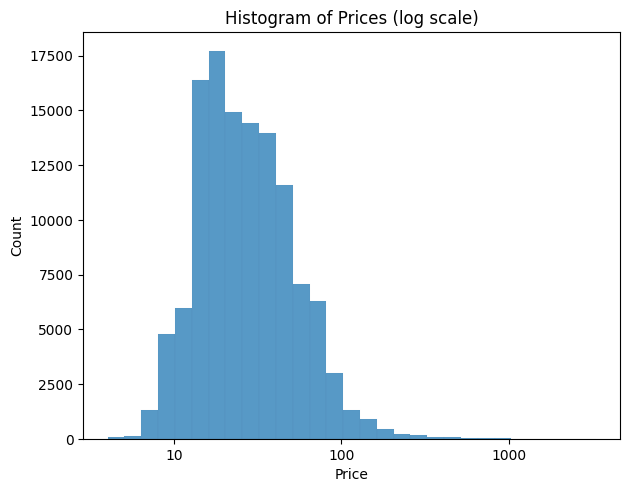

In [24]:
import seaborn as sns
import numpy as np
from matplotlib.ticker import LogLocator, ScalarFormatter, NullFormatter

price = df["price"].dropna()
bins = np.logspace(np.log10(price.min()), np.log10(price.max()), 30)

sns.histplot(price, bins=bins)
ax = plt.gca()

ax.set_xscale("log")
ax.xaxis.set_major_locator(LogLocator(base=10, numticks=6))
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_locator(LogLocator(base=10, subs=[]))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.ticklabel_format(style="plain", axis="x")

plt.xlabel("Price")
plt.tight_layout()
plt.title("Histogram of Prices (log scale)")
plt.show()

##### Price vs Points

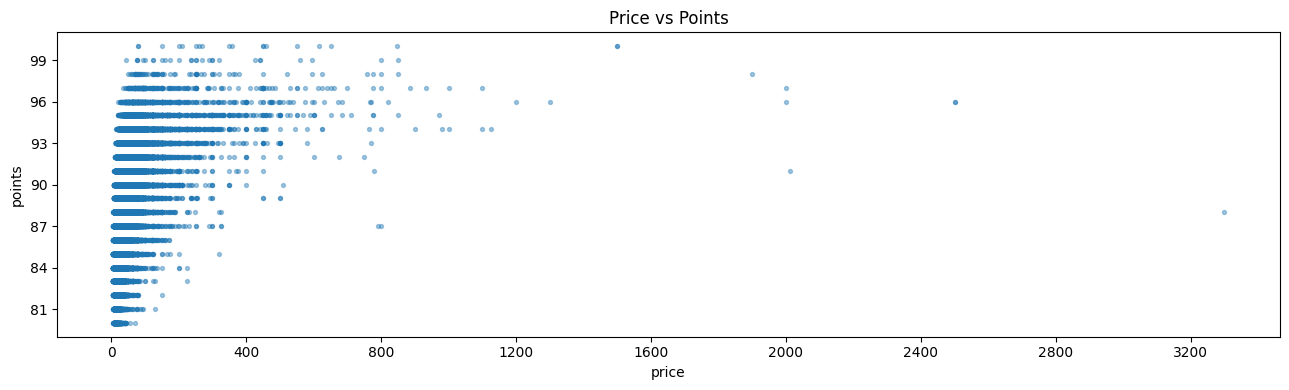

In [25]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

tmp = df[["points", "price"]].dropna()

fig, ax = plt.subplots(figsize=(13,4))
ax.scatter(tmp["price"], tmp["points"], alpha=0.4, s=8)
ax.set_xlabel("price")
ax.set_ylabel("points")
ax.set_title("Price vs Points")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()

### Categorical features

#### Categorical columns overview


In [26]:
df.describe(include="object").T.sort_values("unique", ascending=False)

,count,unique,top,freq
description,129971,119955,"Seductively tart in lemon pith, cranberry and ...",3
designation,92506,37979,Reserve,2009
winery,129971,16757,Wines & Winemakers,222
region_1,108724,1229,Napa Valley,4480
variety,129970,707,Pinot Noir,13272
province,129908,425,California,36247
country,129908,43,US,54504
taster_name,103727,19,Roger Voss,25514


#### Top categories (barplots)


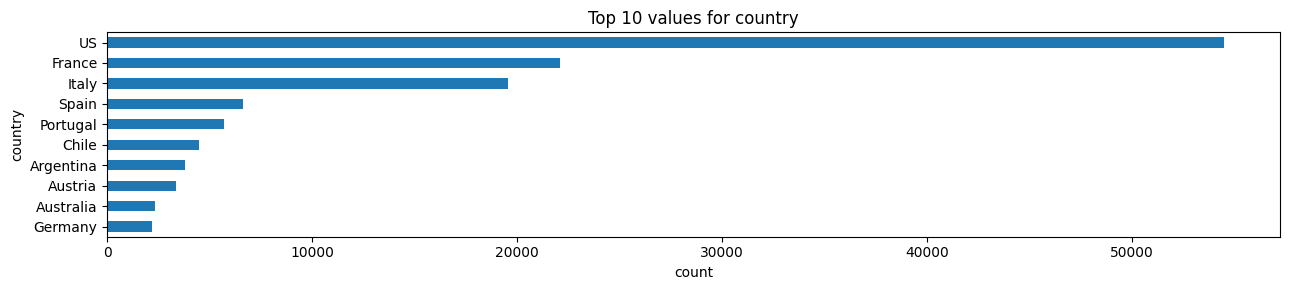

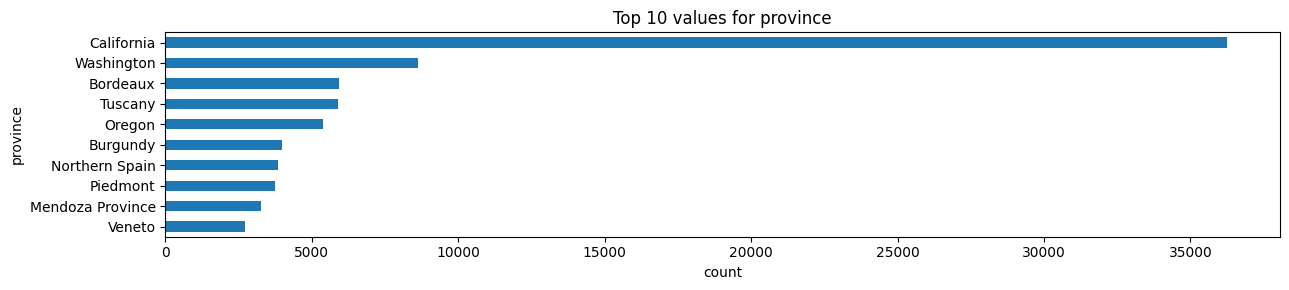

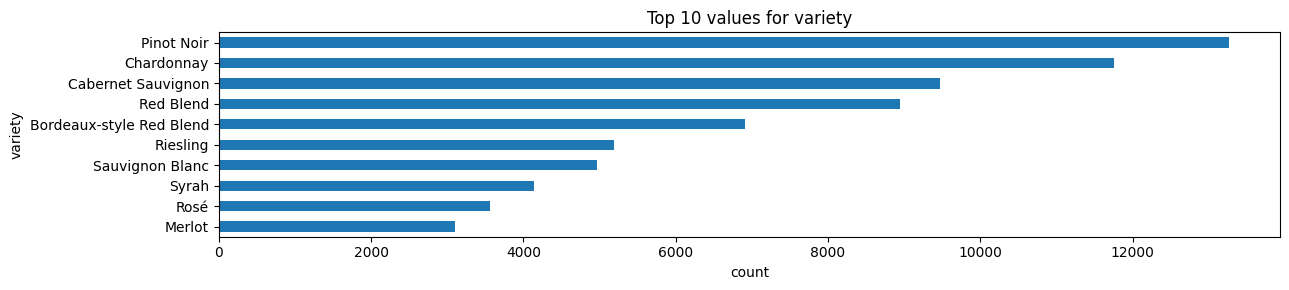

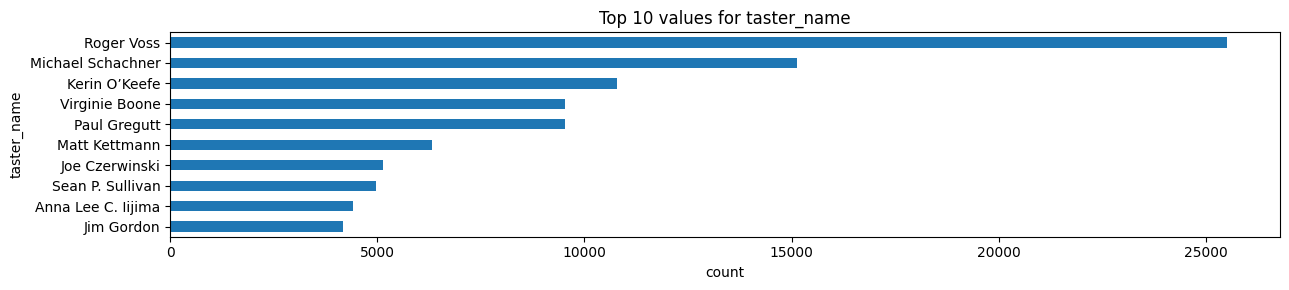

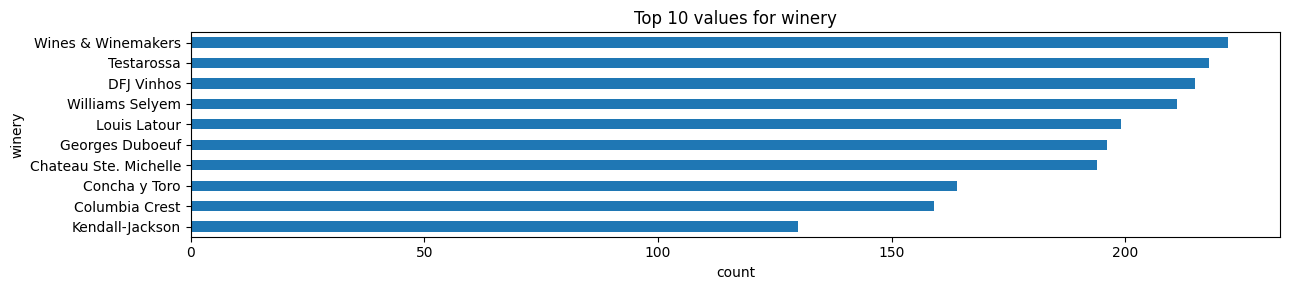

In [27]:
import matplotlib.pyplot as plt

top_n = 10
plot_cols = [c for c in ["country", "province", "variety", "taster_name", "winery"] if c in df.columns]

for col in plot_cols:
    vc = df[col].value_counts().head(top_n).sort_values()
    ax = vc.plot(kind="barh", figsize=(13,3), title=f"Top {top_n} values for {col}")
    ax.set_xlabel("count")
    plt.tight_layout()
    plt.show()


#### Rank-frequency plots

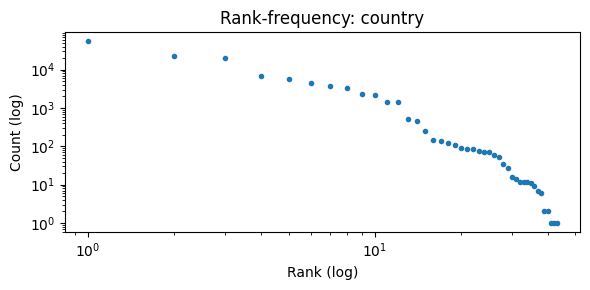

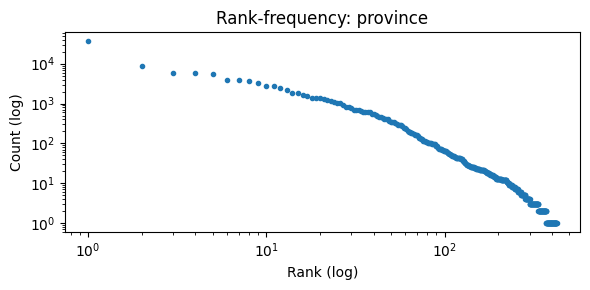

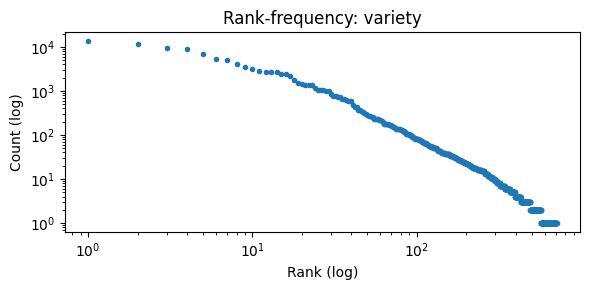

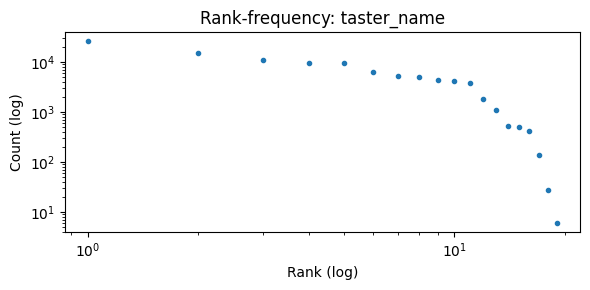

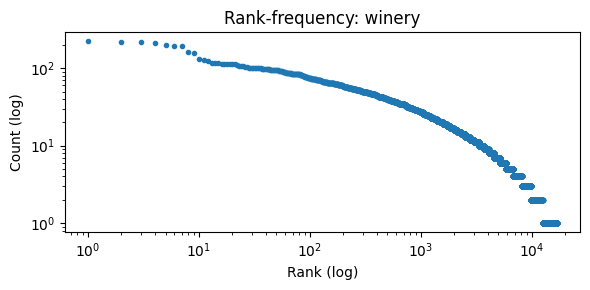

In [28]:
import matplotlib.pyplot as plt

plot_cols = [c for c in ["country", "province", "variety", "taster_name", "winery"] if c in df.columns]

for col in plot_cols:
    vc = df[col].value_counts()
    ranks = range(1, len(vc) + 1)

    plt.figure(figsize=(6,3))
    plt.plot(ranks, vc.values, marker=".", linestyle="none")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(f"Rank-frequency: {col}")
    plt.xlabel("Rank (log)")
    plt.ylabel("Count (log)")
    plt.tight_layout()
    plt.show()


#### Testers

In [29]:
df["taster_name"].dropna().value_counts()

taster_name
Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: count, dtype: int64

<Axes: title={'center': 'Number of reviews for tester'}, xlabel='taster_name'>

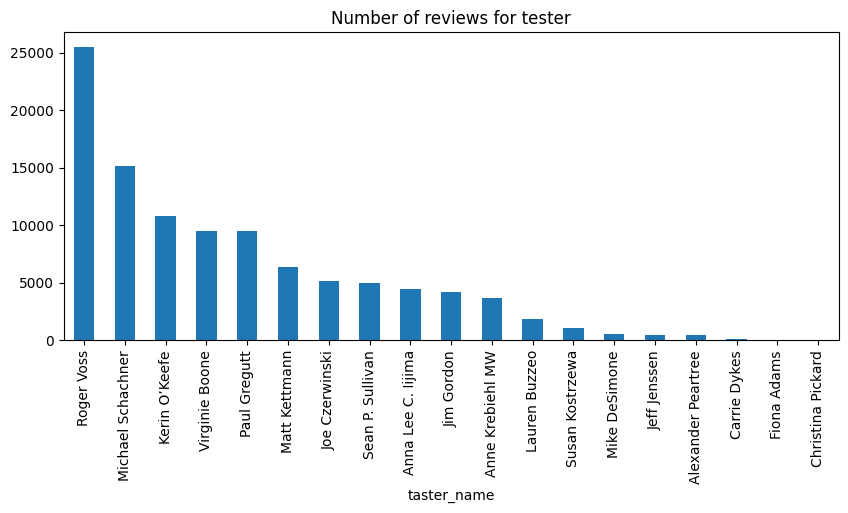

In [30]:
df["taster_name"].dropna().value_counts().plot(kind="bar", figsize=(10,4), title="Number of reviews for tester")

## Missing values

#### Missing values summary (sorted)


In [31]:
missing = df.isna().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    "missing": missing,
    "missing_pct": missing_pct,
})
missing_df = missing_df[missing_df["missing"] > 0].sort_values("missing_pct", ascending=False)
display(missing_df)


,missing,missing_pct
designation,37465,28.83
taster_name,26244,20.19
region_1,21247,16.35
price,8996,6.92
vintage,4631,3.56
country,63,0.05
province,63,0.05
variety,1,0.00


#### Missing values heatmap (sample)


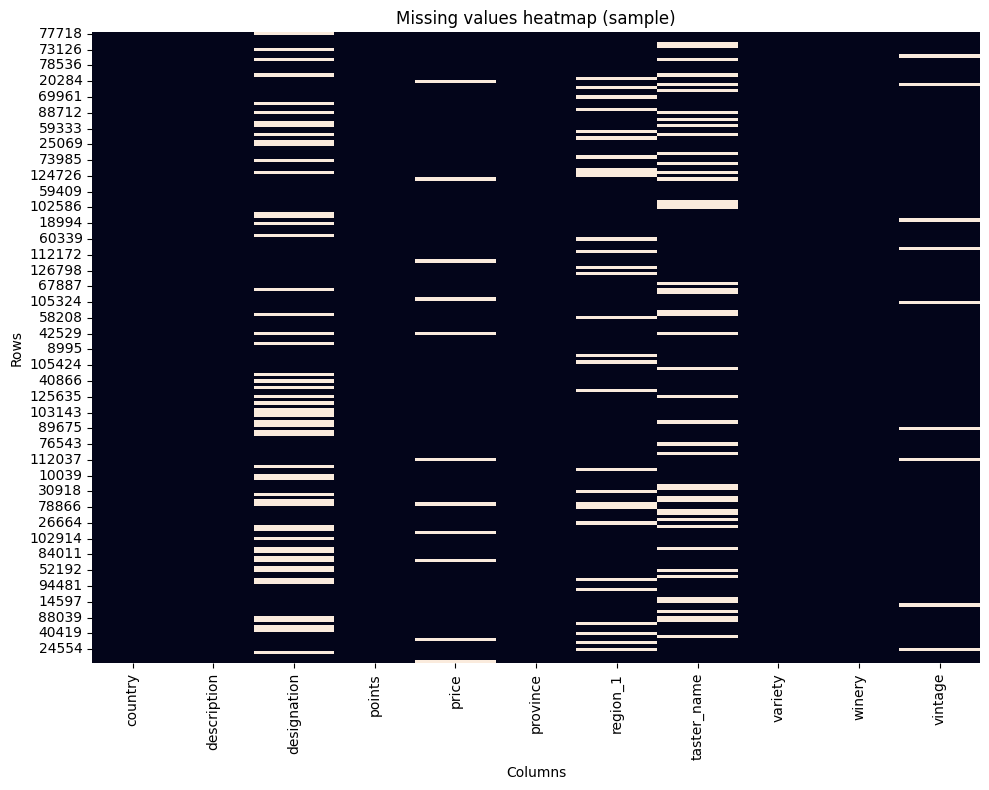

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sample = df.sample(200, random_state=42) if len(df) > 1000 else df

plt.figure(figsize=(10,8))
sns.heatmap(sample.isna(), cbar=False)
plt.title("Missing values heatmap (sample)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()


#### Columns above missing threshold


In [33]:
threshold = 21
cols_high_missing = missing_df[missing_df["missing_pct"] > threshold].index.tolist()
cols_high_missing

['designation']

# Summary of modifications
- add vintage column
- delete title column
- delete region_2 column
- delete taster_twitter_handle column

In [34]:
df

,country,description,designation,points,price,province,region_1,taster_name,variety,winery,vintage
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,Anna Lee C. Iijima,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Paul Gregutt,Pinot Noir,Citation,2004
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,Gewürztraminer,Domaine Gresser,2013
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,Roger Voss,Pinot Gris,Domaine Marcel Deiss,2012


## Commands to recreate modifications
```python
import pandas as pd
from collections import Counter

year_pat = r"\b(\d{4})\b"
nv_pat   = r"\bN\.?V\.?\b|\bNon[- ]?Vintage\b"

has_nv = df["title"].fillna("").str.contains(nv_pat, case=False, na=False)

title_years  = df["title"].fillna("").str.findall(year_pat)
desig_years  = df["designation"].fillna("").str.findall(year_pat)
winery_years = df["winery"].fillna("").str.findall(year_pat)

def extract_vintage(nv, tys, dys, wys):
    if nv:
        return pd.NA

    c = Counter(tys)
    c.subtract(dys)
    c.subtract(wys)

    for y, n in c.items():
        if n > 0:
            return int(y)

    return pd.NA # impossible case

df["vintage"] = pd.Series(
    [
        extract_vintage(nv, tys, dys, wys)
        for nv, tys, dys, wys in zip(
            has_nv, title_years, desig_years, winery_years
        )
    ],
    index=df.index,
    dtype="Int64",
)

df = df.drop(columns=["title", "region_2", "taster_twitter_handle"])
```

# Save preprocessed dataframe


In [35]:
# Save preprocessed dataframe (after all modifications above)
df.to_csv(CSV_FILEPATH_EXPLORATION_PREPROCESSED_DATA, index=False)
